Walmart Sales Forecasting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


In [3]:
df = pd.read_csv("Data/train.csv")

print(df.head())
print(df.info())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['Day'] = df['Date'].dt.day

df['Lag1'] = df['Weekly_Sales'].shift(1)
df['Lag2'] = df['Weekly_Sales'].shift(2)

df = df.fillna(0)

In [5]:
X = df[['Store','Dept','Year','Month','Week','Day','Lag1','Lag2']]
y = df['Weekly_Sales']

split_index = int(len(df)*0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2: 0.031301992945938384
Linear Regression RMSE: 21600.831087250193


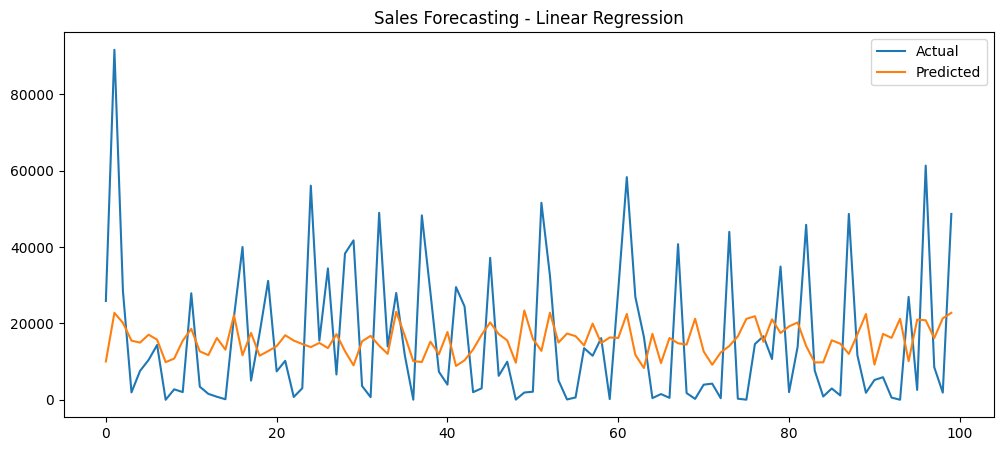

In [7]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label="Actual")
plt.plot(y_pred[:100], label="Predicted")
plt.title("Sales Forecasting - Linear Regression")
plt.legend()
plt.show()

BONUS

In [8]:
df['Rolling_Mean'] = df['Weekly_Sales'].rolling(window=4).mean().fillna(0)

X = df[['Store','Dept','Year','Month','Week','Day','Lag1','Lag2','Rolling_Mean']]
y = df['Weekly_Sales']

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [9]:
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost R2:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

XGBoost R2: 0.909313569378652
XGBoost RMSE: 6609.177444197197


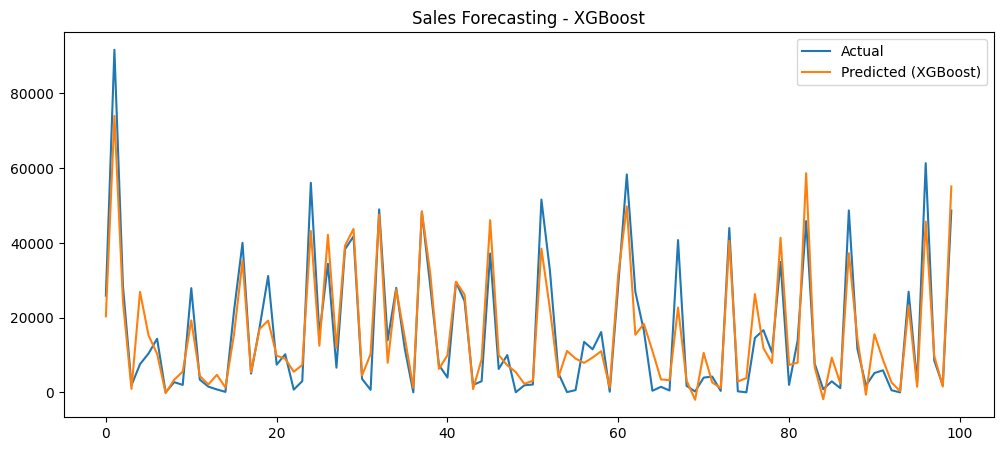

In [10]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label="Actual")
plt.plot(y_pred_xgb[:100], label="Predicted (XGBoost)")
plt.title("Sales Forecasting - XGBoost")
plt.legend()
plt.show()